In [12]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Probability Distributions

## Uniform Distribution

Many useful functions for working with probability distributions in Python are contained in the `scipy.stats` library. Let's load in some libraries, generate some uniform data and plot a density curve:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
import math

%matplotlib inline

In [3]:
uniform_data = stats.uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10
type(uniform_data)    # it is in numpy array form
uniform_data.shape

(100000,)

`pandas.DataFrame.plot` Make plots of DataFrame using matplotlib / pylab.

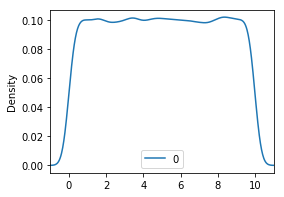

In [5]:
plot = pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(4,3),
                               xlim=(-1,11))

**Note:** <br>
the plot above is an approximation of the underlying distribution, since it is based on a sample of observations.
In the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.
Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest: <br>
 + `stats.distribution.rvs()` generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.).
 + `stats.distribution.cdf()` is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the cumulative distribution function.). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():

In [9]:
stats.uniform.cdf(x=15,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

1.0

 + `stats.distribution.ppf()` is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():

In [10]:
stats.uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

 + `stats.distribution.pdf()` gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:

In [7]:
for x in range(-1,12,3):
    print("Density at x value " + str(x) + ":")
    print( stats.uniform.pdf(x, loc=0, scale=10), "\n" )   

Density at x value -1:
0.0 

Density at x value 2:
0.1 

Density at x value 5:
0.1 

Density at x value 8:
0.1 

Density at x value 11:
0.0 



Probability distribution functions in `scipy` also support median(), mean(), var() and std().

# Generating Random Numbers and Setting The Seed
When you need to generate random real numbers in a range with equal probability you can draw numbers from a uniform distribution using `stats.distribution.rvs()`. Python also comes with a library called "random" that lets you perform various operations that involve randomization. Let's look at a few functions in the random library:

In [11]:
import random
random.randint(0,10)     # Get a random integer in the specified range
random.choice([2,4,6,9]) # Get a random element from a sequence
random.random()          # Get a real number between 0 and 1
random.uniform(0,10)     # Get a real in the specified range

4.002895713280942

Notice that the `random` library also lets you generate random uniform numbers. Regardless of the method you use to generate random numbers, however, the result of a random process can differ from one run to the next. Having results vary each time you run a function is often not desirable. For example, if you want a colleague to be able to reproduce your results exactly, you can run into problems when you use randomization. You can ensure that your results are the same each time you use a function that involves randomness by setting the random number generator's *seed* value to initialize it prior to running the function. Set the random seed with `random.seed()`:

In [15]:
random.seed(12)  # Set the seed to an arbitrary value
print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # Set the seed to a different value
print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


Notice that we generated the exact same numbers with both calls to `random.uniform()` because we set the same seed before each call. If we had not set the seed, we would have gotten different numbers. This reproducibility illustrates the fact that **these random numbers aren't truly random**, but rather *pseudorandom*.

**Note:**

  + Many functions in Python's libraries that use randomness have an optional random seed argument built in so that you don't have to set the seed outside of the function. For instance, the `rvs()` function has an optional argument `random_state`, that lets you set the seed.
  + The Python standard library `random` has a separate internal seed from the numpy library. When using functions from numpy and libraries built on top of numpy (pandas, scipy, scikit-learn) use `np.random.seed()` to set the seed.

## The Normal Distribution
The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about $68$% of the data lies within $1$ standard deviation of the mean, $95$% lies within $2$ standard deviations and $99.7$% lies within $3$ standard deviations.

The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.
The `scipy` nickname for the normal distribution is `norm`. Let's investigate the normal distribution:

In [18]:
prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1)
print(prob_over_1)
print(between_prob)

0.15865525393145707
0.15865525393145707
0.6826894921370859


The output shows that roughly $16$% of the data generated by a normal distribution with mean $0$ and standard deviation $1$ is below $-1$, $16$% is above $1$ (symmetry) and $68$% lies between $-1$ and $1$, which agrees with the $68$, $95$, $99.7$ rule. Let's plot the normal distribution and inspect areas we calculated:

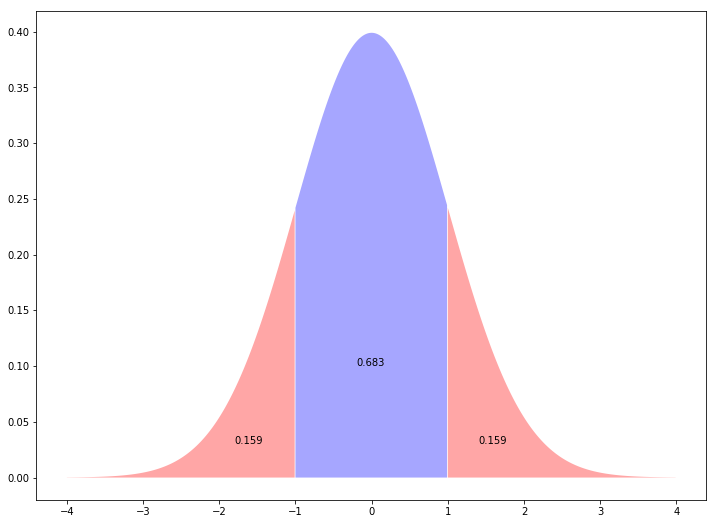

In [19]:
# Plot normal distribution areas*
plt.rcParams["figure.figsize"] = (12,9)
                                 
part1 = plt.fill_between(x=np.arange(-4,-1,0.01),
                         y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                         facecolor='red',
                         alpha=0.35)

part2 = plt.fill_between(x=np.arange(1,4,0.01), 
                         y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                         facecolor='red',
                         alpha=0.35)

part3 = plt.fill_between(x=np.arange(-1,1,0.01), 
                         y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                         facecolor='blue',
                         alpha=0.35)

text1 = plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
text2 = plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
text3 = plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

**Note:** 

The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within $1$ standard deviation of the mean.
Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with `stats.norm.ppf()`:

In [12]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff
print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


The quantile output above confirms that roughly $5$% of the data lies more than $2$ standard deviations from the mean.

**Note:** 

a mean of $0$ and standard deviation of $1$ are default values for the normal distribution.

## The Poisson Distribution
The *Poisson* distribution models the **probability of seeing a certain number of successes within a time interval**, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as 

  + the number of arrivals a hospital can expect in an hour's time, or 
  + the number of emails you'd expect to receive in a week.
  
The `scipy` name for the Poisson distribution is `poisson`. Let's generate and plot some data from a Poisson distribution with an arrival rate of $1$ per time unit:

col_0      0     1     2    3    4   5  6  7  8
row_0                                          
counts  3663  3715  1857  572  153  34  4  1  1


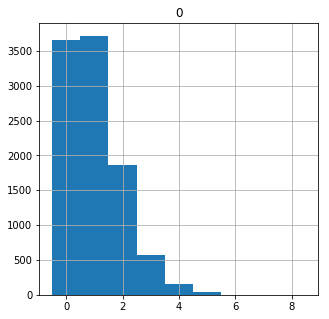

In [13]:
random.seed(12)
arrival_rate_1 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
hist = pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),
                                         bins=max(arrival_rate_1)+1, figsize=(5,5))

The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:

col_0   1   2   3    4    5    6    7     8     9     10  ...   15   16   17  \
row_0                                                     ...                  
counts   5  16  92  187  350  640  898  1077  1252  1289  ...  344  235  140   

col_0   18  19  20  21  22  23  24  
row_0                               
counts  74  46  12   4   5   1   1  

[1 rows x 24 columns]


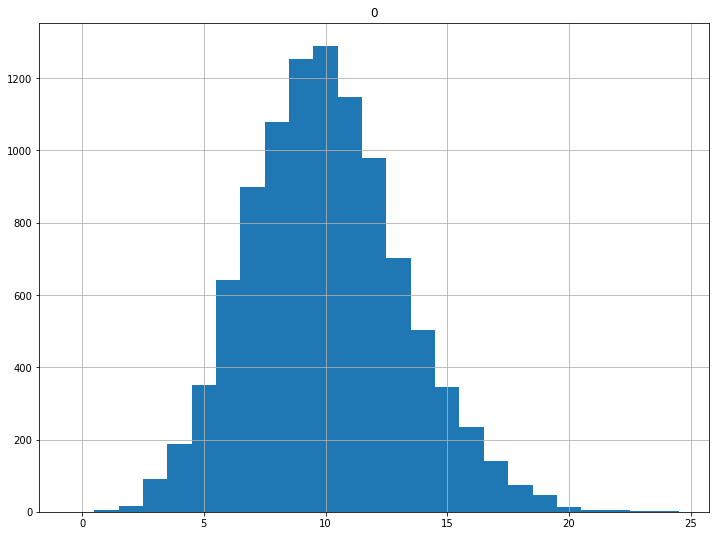

In [14]:
random.seed(12)
arrival_rate_10 = stats.poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10 )       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
hist = pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5),
                                          bins=max(arrival_rate_10)+1)

As with other discrete probability distributions, we can use `cdf()` to check the probability of achieving more or less than a certain number of successes and `pmf()` to check the probability of obtaining a specific number of successes:

In [15]:
stats.poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
                  mu=10)   # With arrival rate 10

0.06708596287903189

In [16]:
stats.poisson.pmf(k=10,     # Check the prob f exactly 10 arrivals
                  mu=10)    # With arrival rate 10

0.12511003572113372

**Wrap Up**

Python's scipy library contains functions that make it easy to work with a wide range of probability distributions, including many that we did not discuss in this lesson. Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.
In the next few lessons, we'll learn how to carry out common statistical tests with Python.

## Point Estimates

Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. The average of a sample is known as the sample mean.

The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean.

In [20]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372

In [21]:
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,
                               size=500)            # Sample 500 values

print ( sample_ages.mean() )                         # Show sample mean

42.388


In [22]:
population_ages.mean() - sample_ages.mean()   # Check difference between means

0.614372000000003

Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

Another point estimate that may be of interest is the proportion of the population that belongs to some category or subgroup. For example, we might like to know the race of each voter we poll, to get a sense of the overall demographics of the voter base. You can make a point estimate of this sort of proportion by taking a sample and then checking the ratio in the sample.

In [20]:
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
    
demo_sample = random.sample(population_races, 1000)   # Sample 1000 values

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000 )

asian proportion estimate:
0.099
hispanic proportion estimate:
0.192
other proportion estimate:
0.099
black proportion estimate:
0.231
white proportion estimate:
0.379


In [21]:
for race in set(population_races):
    print( race + " true proportion:" )
    print( population_races.count(race)/250000)

asian true proportion:
0.1
hispanic true proportion:
0.2
other true proportion:
0.1
black true proportion:
0.2
white true proportion:
0.4


*Note that the proportion estimates are close to the true proportions

## Sampling Distributions and The Central Limit Theorem


Many statistical procedures assume that data follows a normal distribution, because the normal distribution has nice properties like symmetricity and having the majority of the data clustered within a few standard deviations of the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed. Let's investigate by plotting the data and sample we created earlier and by checking the skew.

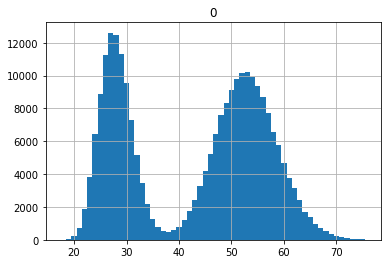

In [23]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(6,4));

In [23]:
print( stats.skew(population_ages) )

-0.12008483603917186


The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. The sample we drew from this population should have roughly the same shape and skew.

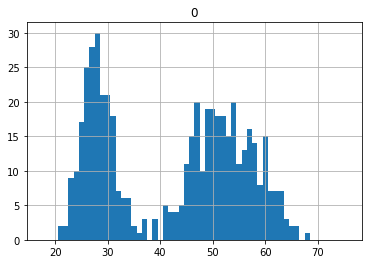

In [24]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(6,4));

In [25]:
print( stats.skew(sample_ages) )

-0.056225282585406065


The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that assume a normal distribution to this data set, since it is not normal. In reality, we can, thanks the central limit theorem.
The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.
To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean.

In [30]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=30)
    point_estimates.append( sample.mean() )  

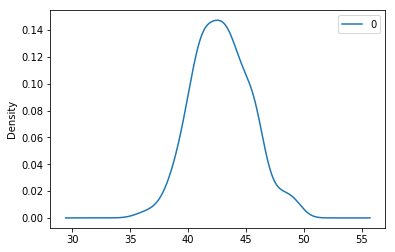

In [31]:
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(6,4));   

The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. In addition, the mean of the sampling distribution approaches the true population mean:

In [32]:
population_ages.mean() - np.array(point_estimates).mean()

0.1118719999999982

The more samples we take, the better our estimate of the population parameter is likely to be.

## Confidence Intervals

A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.
Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.
If you do not know the standard deviation of the population, you can estimate it with the standard deviation of the sample.

The z-critical value is the number of standard deviations you'd have to go from the mean of the normal distribution to capture the proportion of the data associated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical values with `stats.norm.ppf()`.).
Let's calculate a 95% confidence for our mean point estimate:

In [34]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()
print(sample_mean)
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("95% Confidence interval for the mean:")
print(confidence_interval)

42.523
z-critical value:
1.959963984540054
95% Confidence interval for the mean:
(41.70306406882683, 43.34293593117317)


*Note: We use `stats.norm.ppf(q = 0.975)` to get the desired z-critical value instead of `q = 0.95` because the distribution has two tails.


Notice that the confidence interval we calculated captures the true population mean of 43.0023.
Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the true mean.

In [35]:
np.random.seed(15)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(20):  # We want 20 different confidence intervals
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

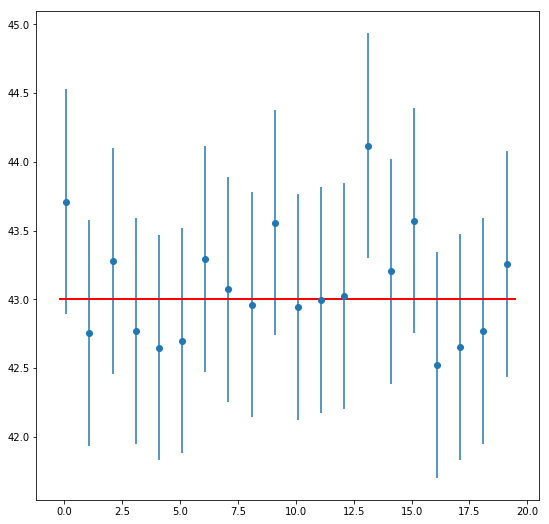

In [36]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 20, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=-0.2, xmax=19.5,
           y=43.0023, 
           linewidth=2.0,
           color="red");

#### Wrap Up
Estimating population parameters through sampling is a simple, yet powerful form of inference. Point estimates combined with error margins let us create confidence intervals that capture the true population parameter with high confidence.